In [57]:
NYC_Poverty <- read.csv("NYCgov_Poverty_Measure_Data__2018_.csv") # load original dataset

library(ggplot2)
library(broom)
library(dplyr)
library(stringr)
library(tidyverse)

In [58]:
head(NYC_Poverty)

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,⋯,NYCgov_IncomeTax,NYCgov_Income,NYCgov_EITC,Off_Threshold,Off_Pov_Stat,NYCgov_Threshold,NYCgov_Pov_Stat,NYCgov_PovGapIndex,NYCgov_PovGap,X
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1,1,95,95,31,1,0,1,0,22,⋯,33917.9858,81735.03,0,13064,2,16241.60,2,0,0,NA
2,1000033,1,53,53,29,5,0,1,0,20,⋯,16621.7209,77887.22,0,16815,2,22900.65,2,0,0,NA
3,1000033,2,61,53,30,5,1,1,0,21,⋯,16621.7209,77887.22,0,16815,2,22900.65,2,0,0,NA
4,1000058,1,152,152,68,1,0,1,0,12,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA
5,1000058,2,144,152,71,1,1,1,0,16,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA
6,1000058,3,110,152,6,1,10,3,3,3,⋯,-348.8956,31379.97,0,20212,2,30845.14,2,0,0,NA


In [59]:
subset <- NYC_Poverty[, c("SERIALNO", "AGEP", "CIT", "SEX", "ESR", "LANX", "ENG", "MAR", "DIS", "TEN", 'FamType_PU', "WAGP_adj", "SSP_adj", "RNTP_adj", "Ethnicity", "Boro", "EducAttain", "FTPTWork", "Off_Pov_Stat", "NYCgov_Income", "NYCgov_Pov_Stat", "NYCgov_Childcare", "NYCgov_Commuting", "NYCgov_MOOP", "NYCgov_MedSpending", "NYCgov_MedPremiums", "NYCgov_HEAP", "NYCgov_SNAP", "NYCgov_SchoolLunch", "NYCgov_SchoolBreakfast", 'NYCgov_Nutrition',"NYCgov_FICAtax", "NYCgov_IncomeTax", "NYCgov_PovGap", "NYCgov_PovGapIndex")]
# first round selection of columns that might be useful in our analysis

In [60]:
head(subset)

,SERIALNO,AGEP,CIT,SEX,ESR,LANX,ENG,MAR,DIS,TEN,⋯,NYCgov_MedPremiums,NYCgov_HEAP,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_Nutrition,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,31,1,2,1,2,NA,5,2,2,⋯,1560.00,0,0,0.0,0.00,0.00,9765.242,33917.9858,0,0
2,1000033,29,5,2,1,1,1,1,2,2,⋯,9648.00,0,0,0.0,0.00,0.00,7750.192,16621.7209,0,0
3,1000033,30,5,1,1,1,2,1,2,2,⋯,9648.00,0,0,0.0,0.00,0.00,7750.192,16621.7209,0,0
4,1000058,68,1,1,6,2,NA,1,1,1,⋯,1407.36,0,0,612.5,306.25,918.75,0.000,-348.8956,0,0
5,1000058,71,1,2,6,2,NA,1,2,1,⋯,1407.36,0,0,612.5,306.25,918.75,0.000,-348.8956,0,0
6,1000058,6,1,2,NA,2,NA,5,2,1,⋯,1407.36,0,0,612.5,306.25,918.75,0.000,-348.8956,0,0


Recode the original dataset

In [61]:
subset$CIT <- recode(subset$CIT, '1'='US citizen', '2'='US citizen', '3'='US citizen', '4'='US citizen', '5'='Non citizen')
subset$SEX <- recode(subset$SEX, '1'='Male', '2'='Female')
subset$Boro <- recode(subset$Boro, '1'='Bronx','2'='Brooklyn', '3'='Manhattan', '4'='Queens', '5'='Staten Island')
subset$ENG <- recode(subset$ENG, '1'='Very well','2'='Well', '3'='Not well', '4'='Not at all')
subset$MAR <- recode(subset$MAR, '1'='Married','2'='Widowed', '3'='Divorced', '4'='Separated', '5'='Never married or under 15')
subset$DIS <- recode(subset$DIS, '1'='Disability','2'='No disability')
subset$TEN <- recode(subset$TEN, '1'='Owned with mortgage or loan','2'='Owned free and clear', '3'='Rented', '4'='Occupied without payment of rent')
subset$FamType_PU <- recode(subset$FamType_PU, '1'='Husband/Wife+child ','2'='Husband/Wife no child ', '3'='Single Male+child', '4'='Single Female+child', '5'='Male unit head, no child','6'='Female unit head, no child','7'='Unrelated Indiv w/others','8'='Unrelated Indiv Alone')
subset$FTPTWork <- recode(subset$FTPTWork, '1'='Full time','2'='Part time','3'='No work')
subset$NYCgov_Pov_Stat <- recode(subset$NYCgov_Pov_Stat, '1'= 'In Poverty', '2'= 'Not in Poverty')

In [62]:
eth.name = c('White','Black','Asian','Hispanic','Others')
subset$Ethnicity = factor(subset$Ethnicity,levels = 1:5,labels = eth.name)

In [63]:
Edu.name = c('less than HS','High School','Some College','Bachelors or higher')
subset$EducAttain = factor(subset$EducAttain,labels = Edu.name)

In [64]:
sum(is.na(subset$ENG)) #to show there are a lot missing values, but we won't delete them because for Part I we only 
# are doing comparative tests across ethnic groups and for Part II R will automatically delete observations with missing
# values in conducting regression.

[1] 37557

In [65]:
cared.cols = c('NYCgov_Income','Ethnicity','EducAttain','FTPTWork','Boro','CIT','ENG','SEX','MAR','DIS','TEN','FamType_PU','AGEP',
                  'NYCgov_MOOP','NYCgov_MedSpending','NYCgov_SNAP','NYCgov_Nutrition','NYCgov_SchoolLunch','NYCgov_Childcare','NYCgov_Commuting')
dat= subset[cared.cols] # create a subset that will be used in the following series of chi sq tests 
 # to observe are there distinctive differences between asian and other ethnic groups 

NYC income

In [66]:
fit = aov(NYCgov_Income~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='White'))
summary(fit)
fit = aov(NYCgov_Income~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Black'))
summary(fit)
fit = aov(NYCgov_Income~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Hispanic'))
summary(fit)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 3.263e+12 3.263e+12   423.4 <2e-16 ***
Residuals   36358 2.802e+14 7.706e+09                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 5.623e+11 5.623e+11     149 <2e-16 ***
Residuals   24771 9.348e+13 3.774e+09                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 2.087e+12 2.087e+12   624.4 <2e-16 ***
Residuals   28068 9.381e+13 3.342e+09                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Education attainment

In [67]:
tb1 = table(dat$Ethnicity,dat$EducAttain)[1:5,]
chisq.test(tb1[c(1,3),]) # white vs asian
chisq.test(tb1[2:3,]) # black vs asian
chisq.test(tb1[c(3,4),]) # hispanic vs asian


	Pearson's Chi-squared test

data:  tb1[c(1, 3), ]
X-squared = 904.06, df = 3, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb1[2:3, ]
X-squared = 932.98, df = 3, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb1[c(3, 4), ]
X-squared = 1456.8, df = 3, p-value < 2.2e-16


Full time/part time/no work (employment)

In [68]:
tb2 = table(dat$Ethnicity,dat$FTPTWork)
chisq.test(tb2[c(1,3),])
chisq.test(tb2[2:3,])
chisq.test(tb2[c(3,4),]) 


	Pearson's Chi-squared test

data:  tb2[c(1, 3), ]
X-squared = 56.851, df = 2, p-value = 4.518e-13



	Pearson's Chi-squared test

data:  tb2[2:3, ]
X-squared = 96.475, df = 2, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb2[c(3, 4), ]
X-squared = 123.34, df = 2, p-value < 2.2e-16


NYC Borough 

In [69]:
tb3 = table(dat$Ethnicity,dat$Boro)
chisq.test(tb3[c(1,3),])
chisq.test(tb3[2:3,])
chisq.test(tb3[c(3,4),]) 


	Pearson's Chi-squared test

data:  tb3[c(1, 3), ]
X-squared = 2674.9, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb3[2:3, ]
X-squared = 2485.2, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb3[c(3, 4), ]
X-squared = 3318.4, df = 4, p-value < 2.2e-16


Citizenship

In [70]:
tb4 = table(dat$Ethnicity,dat$CIT)
chisq.test(tb4[c(1,3),])
chisq.test(tb4[2:3,])
chisq.test(tb4[c(3,4),]) 


	Pearson's Chi-squared test with Yates' continuity correction

data:  tb4[c(1, 3), ]
X-squared = 2201.6, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  tb4[2:3, ]
X-squared = 1057.7, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  tb4[c(3, 4), ]
X-squared = 110.12, df = 1, p-value < 2.2e-16


SEX

In [71]:
tb5 = table(dat$Ethnicity,dat$SEX)
chisq.test(tb5[c(1,3),])
chisq.test(tb5[2:3,])
chisq.test(tb5[c(3,4),]) 


	Pearson's Chi-squared test with Yates' continuity correction

data:  tb5[c(1, 3), ]
X-squared = 3.8457, df = 1, p-value = 0.04987



	Pearson's Chi-squared test with Yates' continuity correction

data:  tb5[2:3, ]
X-squared = 43.941, df = 1, p-value = 3.385e-11



	Pearson's Chi-squared test with Yates' continuity correction

data:  tb5[c(3, 4), ]
X-squared = 4.0753, df = 1, p-value = 0.04352


Marital Status

In [72]:
tb6 = table(dat$Ethnicity,dat$MAR)
chisq.test(tb6[c(1,3),])
chisq.test(tb6[2:3,])
chisq.test(tb6[c(3,4),]) 


	Pearson's Chi-squared test

data:  tb6[c(1, 3), ]
X-squared = 328.41, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb6[2:3, ]
X-squared = 1511, df = 4, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb6[c(3, 4), ]
X-squared = 1356.2, df = 4, p-value < 2.2e-16


Family structure of unit

In [73]:
tb7 = table(dat$Ethnicity,dat$FamType_PU)
chisq.test(tb7[c(1,3),])
chisq.test(tb7[2:3,])
chisq.test(tb7[c(3,4),]) 


	Pearson's Chi-squared test

data:  tb7[c(1, 3), ]
X-squared = 1103.4, df = 7, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb7[2:3, ]
X-squared = 2803.6, df = 7, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  tb7[c(3, 4), ]
X-squared = 1687.7, df = 7, p-value < 2.2e-16


Medical spending

In [74]:
fit = aov(NYCgov_MedSpending~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='White'))
summary(fit)
fit = aov(NYCgov_MedSpending~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Black'))
summary(fit)
fit = aov(NYCgov_MedSpending~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Hispanic'))
summary(fit)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 2.014e+09 2.014e+09   239.2 <2e-16 ***
Residuals   36358 3.060e+11 8.417e+06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq  Mean Sq F value   Pr(>F)    
Ethnicity       1 9.077e+07 90771642   14.46 0.000143 ***
Residuals   24771 1.555e+11  6276784                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 7.299e+08 729907596   125.3 <2e-16 ***
Residuals   28068 1.636e+11   5827045                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

SNAP benefits

In [75]:
fit = aov(NYCgov_SNAP~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='White'))
summary(fit)
fit = aov(NYCgov_SNAP~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Black'))
summary(fit)
fit = aov(NYCgov_SNAP~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Hispanic'))
summary(fit)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 5.079e+09 5.079e+09    1402 <2e-16 ***
Residuals   36358 1.317e+11 3.622e+06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq Mean Sq F value Pr(>F)
Ethnicity       1 8.884e+06 8884146    1.74  0.187
Residuals   24771 1.265e+11 5106148               

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 8.886e+08 888559303   148.1 <2e-16 ***
Residuals   28068 1.684e+11   5999881                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nutrition

In [76]:
fit = aov(NYCgov_Nutrition~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='White'))
summary(fit)
fit = aov(NYCgov_Nutrition~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Black'))
summary(fit)
fit = aov(NYCgov_Nutrition~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Hispanic'))
summary(fit)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 5.556e+09 5.556e+09    1206 <2e-16 ***
Residuals   36358 1.675e+11 4.606e+06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq Mean Sq F value Pr(>F)
Ethnicity       1 2.396e+06 2396161   0.374  0.541
Residuals   24771 1.587e+11 6404862               

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 2.049e+09 2.049e+09   256.4 <2e-16 ***
Residuals   28068 2.243e+11 7.992e+06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

School lunch

In [77]:
fit = aov(NYCgov_SchoolLunch~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='White'))
summary(fit)
fit = aov(NYCgov_SchoolLunch~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Black'))
summary(fit)
fit = aov(NYCgov_SchoolLunch~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Hispanic'))
summary(fit)

               Df    Sum Sq Mean Sq F value   Pr(>F)    
Ethnicity       1 6.638e+06 6637851   24.87 6.17e-07 ***
Residuals   36358 9.705e+09  266933                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq Mean Sq F value Pr(>F)  
Ethnicity       1 6.492e+05  649214   2.898 0.0887 .
Residuals   24771 5.549e+09  224031                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq  Mean Sq F value Pr(>F)    
Ethnicity       1 9.851e+07 98510711   326.8 <2e-16 ***
Residuals   28068 8.462e+09   301477                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Childcare cost

In [78]:
fit = aov(NYCgov_Childcare~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='White'))
summary(fit)
fit = aov(NYCgov_Childcare~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Black'))
summary(fit)
fit = aov(NYCgov_Childcare~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Hispanic'))
summary(fit)

               Df    Sum Sq   Mean Sq F value   Pr(>F)    
Ethnicity       1 6.374e+08 637368764    33.2 8.37e-09 ***
Residuals   36358 6.979e+11  19196099                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq   Mean Sq F value   Pr(>F)    
Ethnicity       1 4.995e+08 499509739   38.59 5.31e-10 ***
Residuals   24771 3.206e+11  12943417                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq   Mean Sq F value   Pr(>F)    
Ethnicity       1 9.131e+08 913143895   40.25 2.27e-10 ***
Residuals   28068 6.368e+11  22687306                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Commuting cost

In [79]:
fit = aov(NYCgov_Commuting~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='White'))
summary(fit)
fit = aov(NYCgov_Commuting~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Black'))
summary(fit)
fit = aov(NYCgov_Commuting~Ethnicity,data=subset(dat,Ethnicity=='Asian'|Ethnicity=='Hispanic'))
summary(fit)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 2.696e+09 2.696e+09   384.8 <2e-16 ***
Residuals   36358 2.548e+11 7.007e+06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq   Mean Sq F value   Pr(>F)    
Ethnicity       1 1.821e+08 182093070   21.98 2.77e-06 ***
Residuals   24771 2.052e+11   8285766                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Ethnicity       1 1.812e+09 1.812e+09   264.7 <2e-16 ***
Residuals   28068 1.922e+11 6.847e+06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message:
“Removed 62378 rows containing non-finite values (stat_boxplot).”


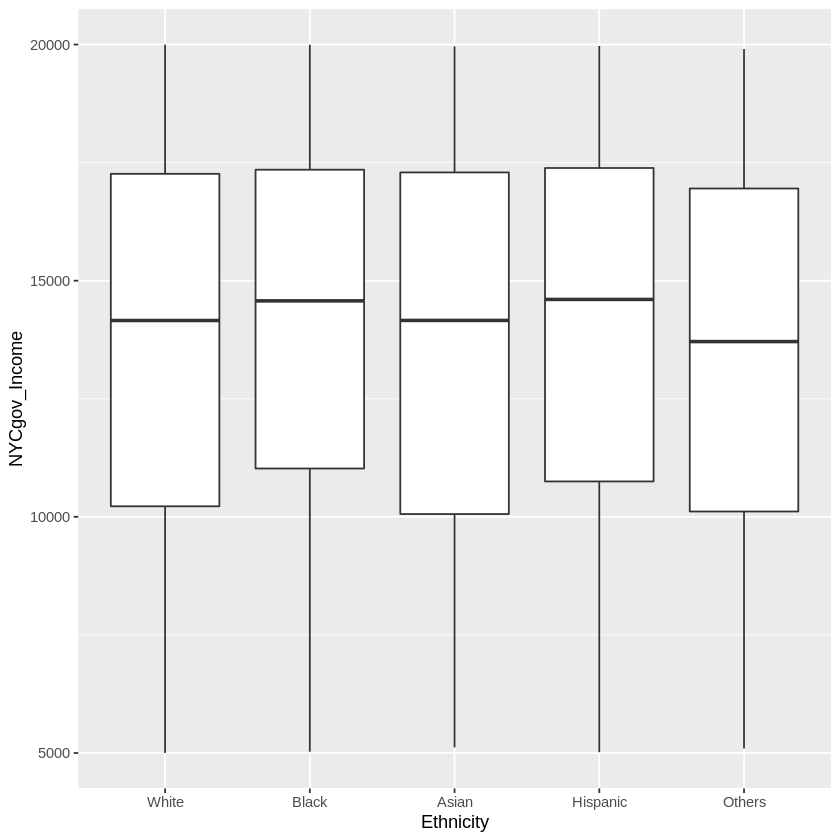

In [80]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_Income))+geom_boxplot()+ylim(5000, 20000) # plot income dist across ethnicities

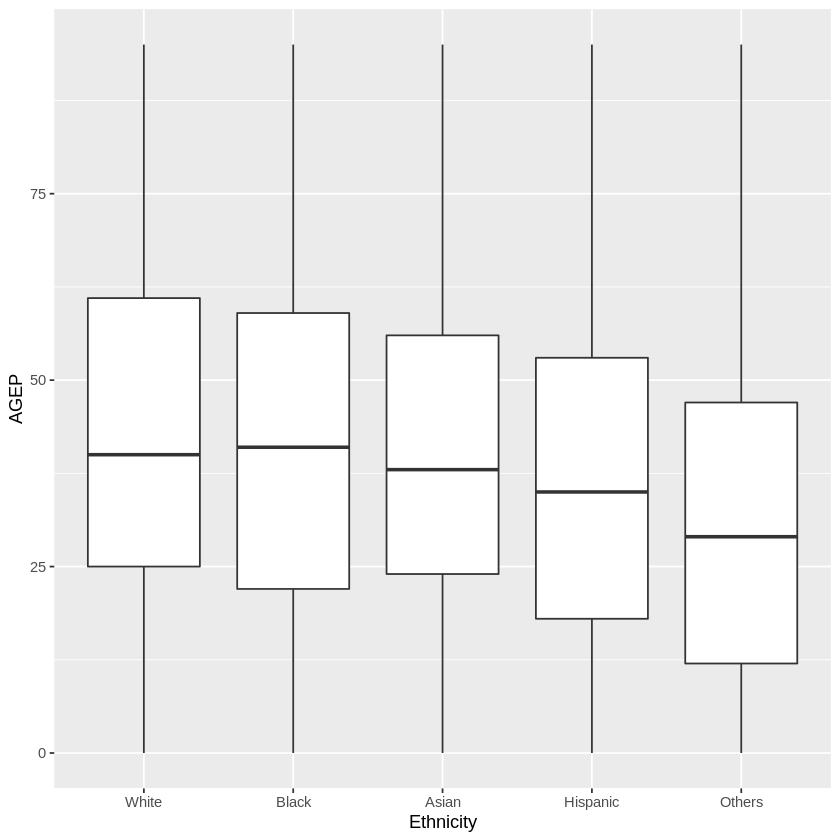

In [81]:
ggplot(subset,aes(x=Ethnicity,y=AGEP))+geom_boxplot() # plot age dist across ethnicities

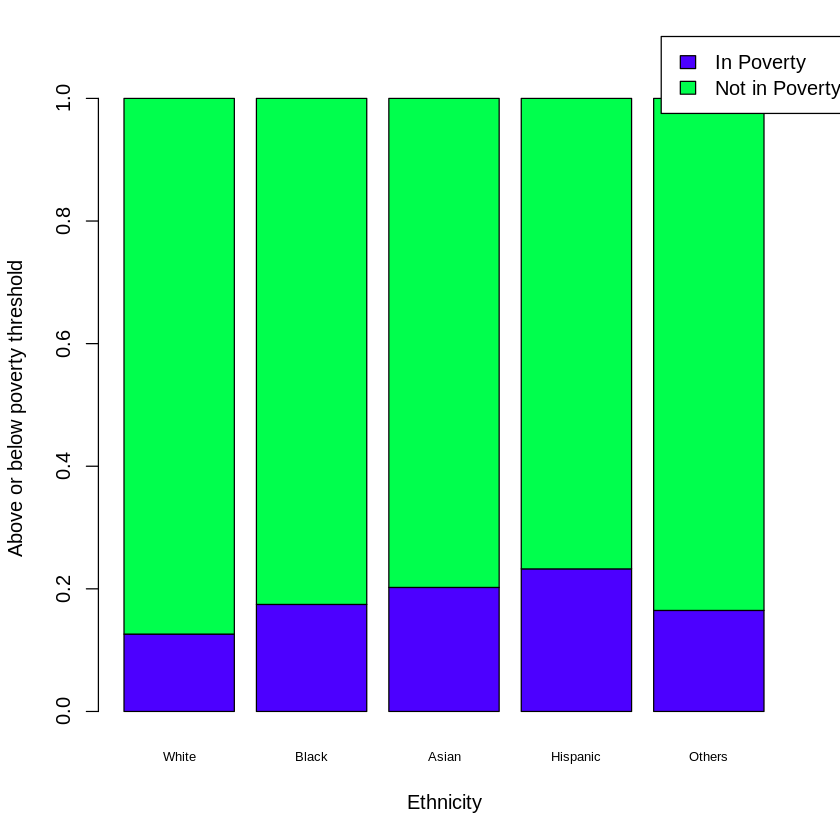

In [82]:
pov.t = prop.table(table(subset$Ethnicity,subset$NYCgov_Pov_Stat),1) # plot poverty status dist across ethnicities
barplot(t(pov.t),col = topo.colors(3),cex.names=0.65,
        xlab = 'Ethnicity',ylab = 'Above or below poverty threshold')
legend(x='topright',legend = rownames(t(pov.t)),inset=-0.1,xpd=T,fill = topo.colors(3))

In [83]:
opar = par(no.readonly =TRUE)
par(mar=c(5,1.8,0.3,1),pin=c(4.8,2.5))
edu.t = prop.table(table(subset$Ethnicity,subset$EducAttain),1)

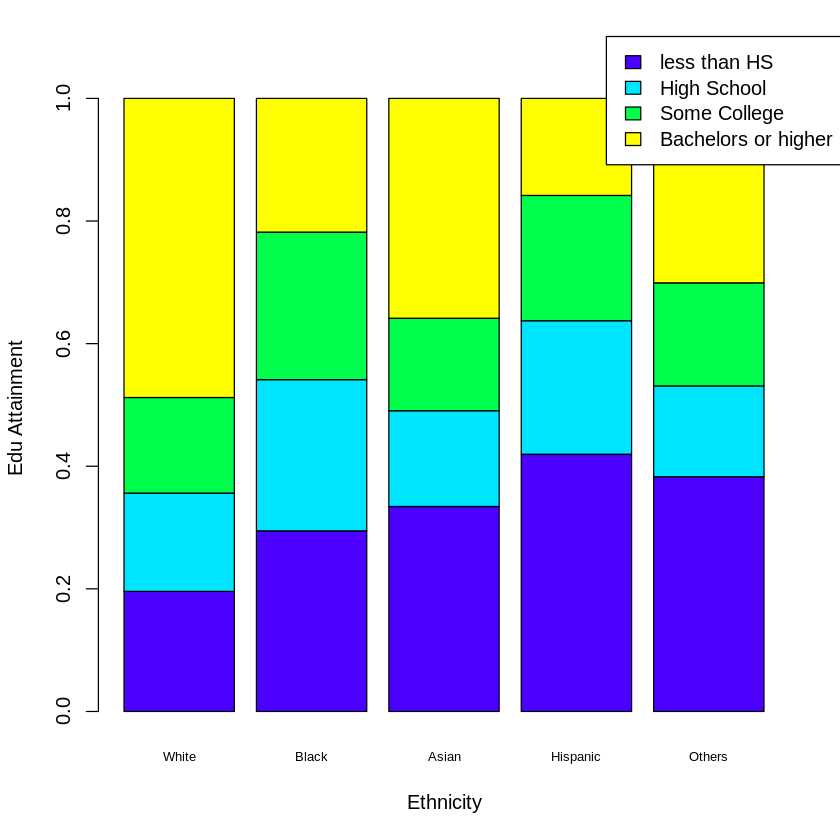

In [84]:
barplot(t(edu.t),col = topo.colors(4),cex.names=0.65, # plot education attainment across
        xlab = 'Ethnicity',ylab = 'Edu Attainment')
legend(x='topright',legend = rownames(t(edu.t)),inset=-0.1,xpd=T,fill = topo.colors(4))

In [85]:
eng.t = prop.table(table(subset$Ethnicity,subset$ENG),1)

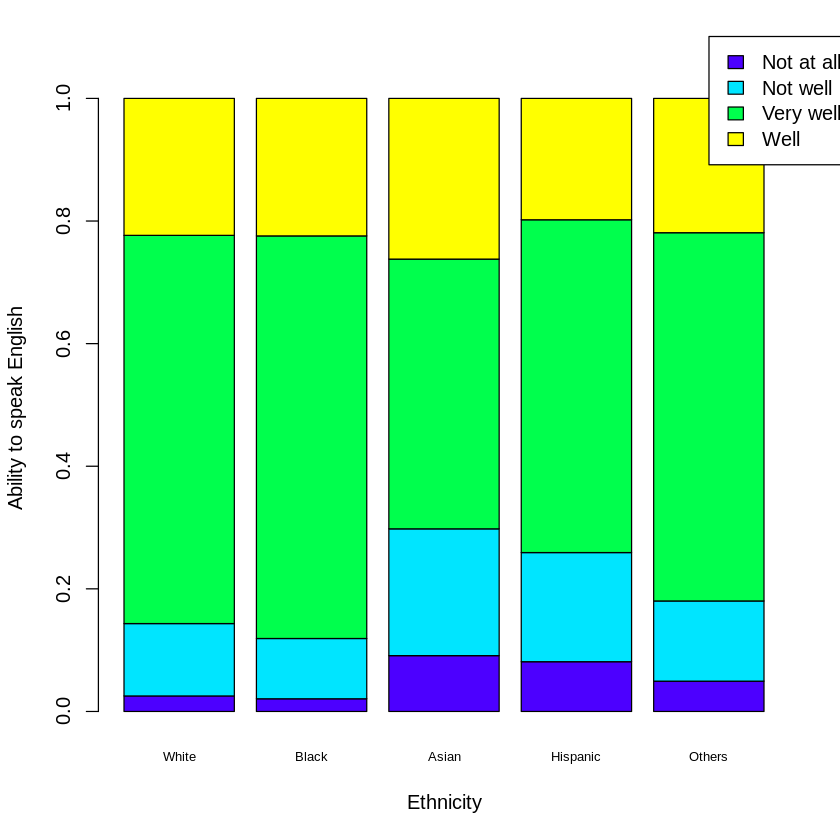

In [86]:
barplot(t(eng.t),col = topo.colors(4),cex.names=0.65, # plot ability to speak English across
        xlab = 'Ethnicity',ylab = 'Ability to speak English')
legend(x='topright',legend = rownames(t(eng.t)),inset=-0.1,xpd=T,fill = topo.colors(4))

In [87]:
dis.t = prop.table(table(subset$Ethnicity,subset$DIS),1)

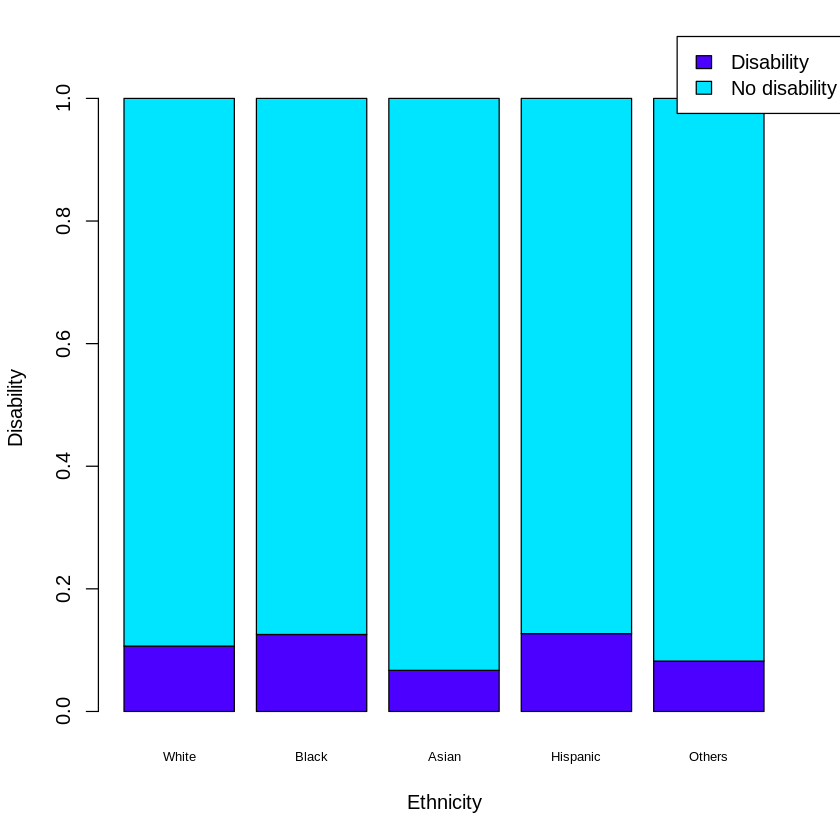

In [88]:
barplot(t(dis.t),col = topo.colors(2),cex.names=0.65, # plot disability across
        xlab = 'Ethnicity',ylab = 'Disability')
legend(x='topright',legend = rownames(t(dis.t)),inset=-0.1,xpd=T,fill = topo.colors(2))

In [89]:
work.t=prop.table(table(subset$Ethnicity,subset$FTPTWork),1)

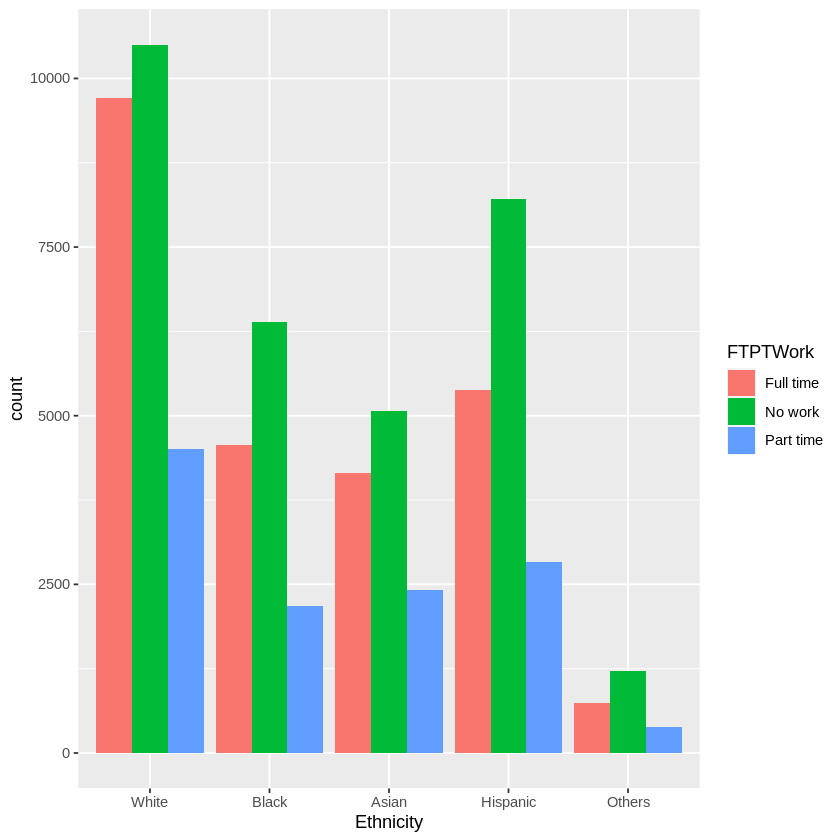

In [90]:
ggplot(data = subset, aes(x = Ethnicity, fill = FTPTWork)) + # plot employment status across in bar type
    geom_bar(position = "dodge")

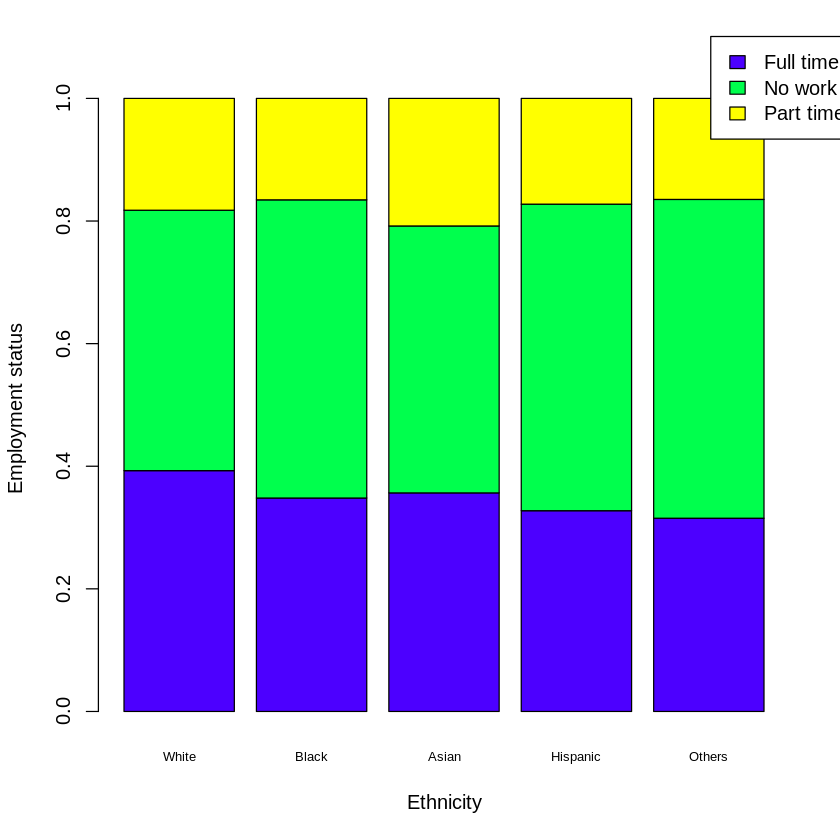

In [91]:
barplot(t(work.t),col = topo.colors(3),cex.names=0.65, # in proportion type
        xlab = 'Ethnicity',ylab = 'Employment status')
legend(x='topright',legend = rownames(t(work.t)),inset=-0.1,xpd=T,fill = topo.colors(3))

Warning message:
“Removed 9743 rows containing non-finite values (stat_boxplot).”


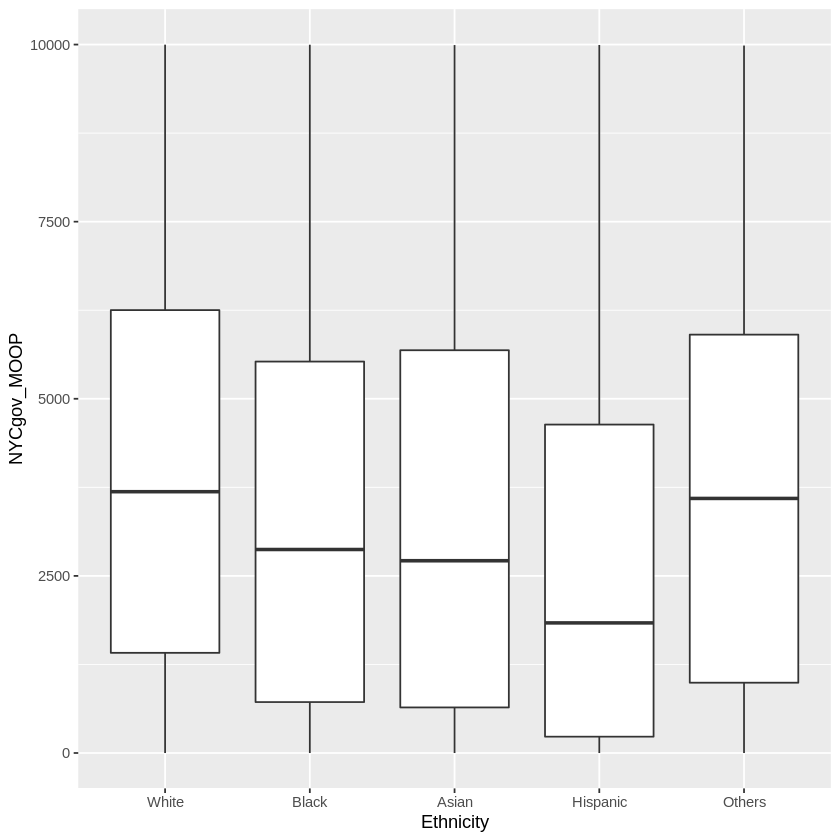

In [92]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_MOOP))+geom_boxplot()+ylim(0, 10000) # plot medical spending across

Warning message:
“Removed 5428 rows containing non-finite values (stat_boxplot).”


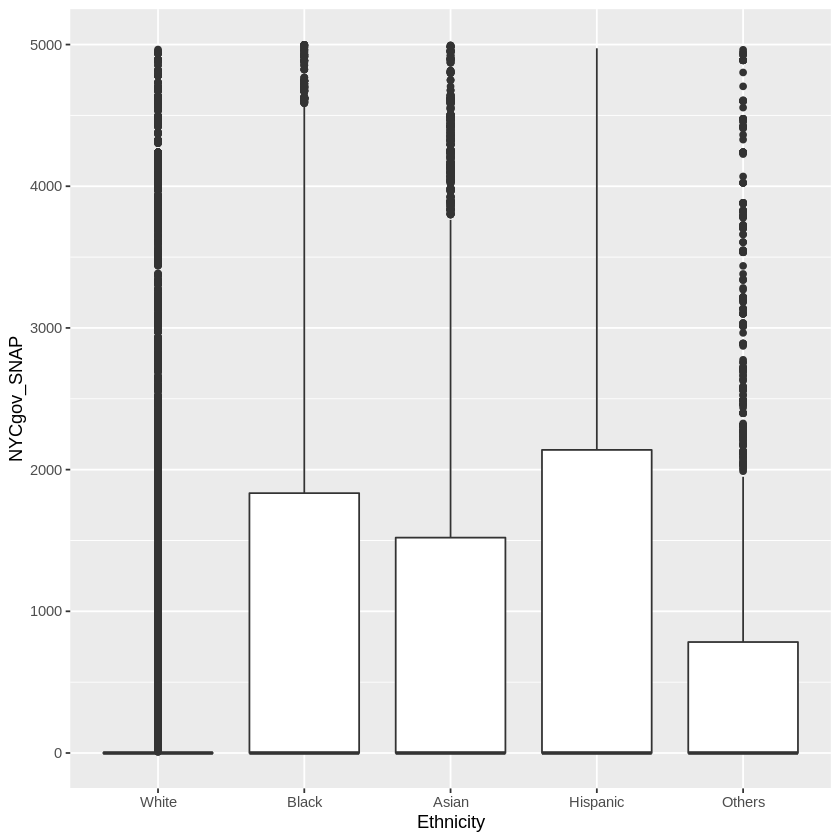

In [93]:
ggplot(subset,aes(x=Ethnicity,y=NYCgov_SNAP))+geom_boxplot()+ylim(0, 5000) # plot SNAP benefit across

Part II: Predict income within Asian group

In [94]:
subset_asians <- subset %>% # create a subset only containing asians
    filter(Ethnicity == "Asian")
head(subset_asians)

,SERIALNO,AGEP,CIT,SEX,ESR,LANX,ENG,MAR,DIS,TEN,⋯,NYCgov_MedPremiums,NYCgov_HEAP,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_Nutrition,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000180,67,US citizen,Female,1,2,NA,Divorced,No disability,Rented,⋯,1165.68,35,0,0,0,0,3828.595,9948.055,0.00,0.0000000
2,1000313,30,Non citizen,Male,1,1,Very well,Never married or under 15,No disability,Rented,⋯,6208.96,0,0,0,0,0,12787.817,37878.217,0.00,0.0000000
3,1000313,26,US citizen,Female,1,1,Well,Never married or under 15,No disability,Rented,⋯,6208.96,0,0,0,0,0,12787.817,37878.217,0.00,0.0000000
4,1000483,30,Non citizen,Male,6,1,Very well,Married,No disability,Rented,⋯,0.00,0,1071,0,0,1071,0.000,0.000,19608.89,0.8562588
5,1000483,29,US citizen,Female,6,1,Very well,Married,No disability,Rented,⋯,0.00,0,1071,0,0,1071,0.000,0.000,19608.89,0.8562588
6,1000635,65,Non citizen,Female,1,1,Not at all,Married,No disability,Rented,⋯,897.00,0,2360,0,0,2360,2247.556,1170.443,0.00,0.0000000


In [95]:
nrow(subset_asians) # know the sample size

[1] 11639

In [96]:
mlr1 <- lm(NYCgov_Income ~ EducAttain+FTPTWork+Boro+ENG+CIT+MAR+SEX+DIS+TEN+FamType_PU+AGEP+NYCgov_MOOP+NYCgov_Nutrition+NYCgov_SchoolLunch+NYCgov_Commuting+NYCgov_Childcare, subset_asians)
summary(mlr1) # missing values get treated and removed automatically, and categorical var receive automatic dummy treatment
tidy(mlr1) # here is the model of regression we use in the analysis


Call:
lm(formula = NYCgov_Income ~ EducAttain + FTPTWork + Boro + ENG + 
    CIT + MAR + SEX + DIS + TEN + FamType_PU + AGEP + NYCgov_MOOP + 
    NYCgov_Nutrition + NYCgov_SchoolLunch + NYCgov_Commuting + 
    NYCgov_Childcare, data = subset_asians)

Residuals:
    Min      1Q  Median      3Q     Max 
-160218  -27597   -6335   17373  573962 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         4.002e+04  7.539e+03   5.308 1.13e-07 ***
EducAttainHigh School              -3.496e+03  1.759e+03  -1.988 0.046890 *  
EducAttainSome College              1.792e+01  1.862e+03   0.010 0.992319    
EducAttainBachelors or higher       1.433e+04  1.718e+03   8.342  < 2e-16 ***
FTPTWorkNo work                    -1.386e+04  1.497e+03  -9.255  < 2e-16 ***
FTPTWorkPart time                  -1.317e+04  1.535e+03  -8.577  < 2e-16 ***
BoroBrooklyn                        7.418e+03  2.843e+03   2.609 0.009085 ** 
BoroManhattan   

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.002207e+04,7539.3879212,5.308397849,1.132611e-07
EducAttainHigh School,-3.495540e+03,1758.7037255,-1.987566025,4.689033e-02
EducAttainSome College,1.792412e+01,1861.7552270,0.009627538,9.923187e-01
EducAttainBachelors or higher,1.433197e+04,1718.0309672,8.342087879,8.390189e-17
FTPTWorkNo work,-1.385580e+04,1497.1449517,-9.254817695,2.646663e-20
FTPTWorkPart time,-1.316742e+04,1535.1763819,-8.577134978,1.136209e-17
BoroBrooklyn,7.417877e+03,2842.7286033,2.609421619,9.084734e-03
BoroManhattan,4.160187e+04,3291.7238596,12.638324038,2.660332e-36
BoroQueens,4.007233e+03,2780.0294362,1.441435375,1.494969e-01


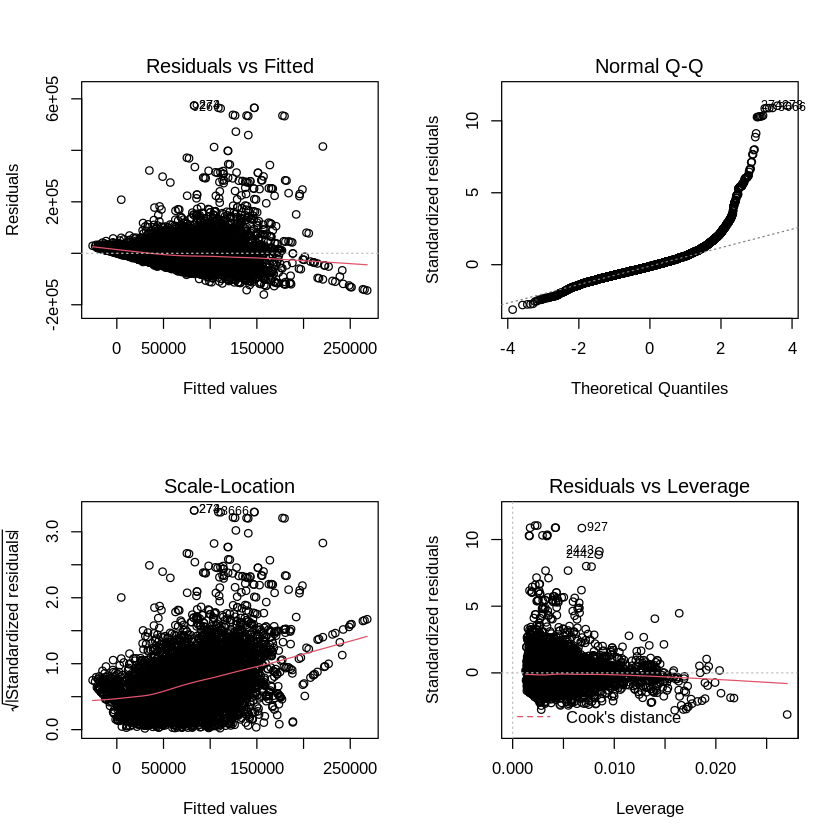

In [97]:
par(mfrow=c(2,2)) # to test normality of error term, heteroscedasticity
plot(mlr1)

In [98]:
glance(mlr1) # r squared

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3247995,0.3221418,52010.48,122.212,0,35,-109601.2,219276.4,219539,2.405366e+13,8892,8928


In [99]:
mlr1_aug <- augment(mlr1)


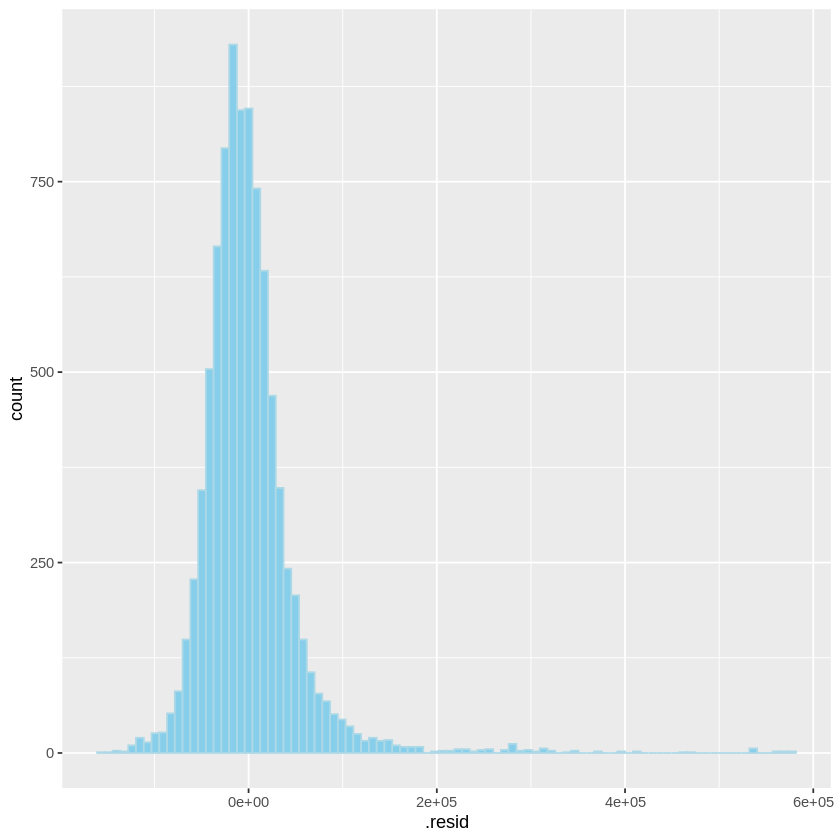

In [100]:
ggplot(mlr1_aug, aes(x = .resid)) + 
    geom_histogram(colour = "lightblue", fill = "skyblue", bins = 90) # distribution of residuals to test the legitimacy of regression

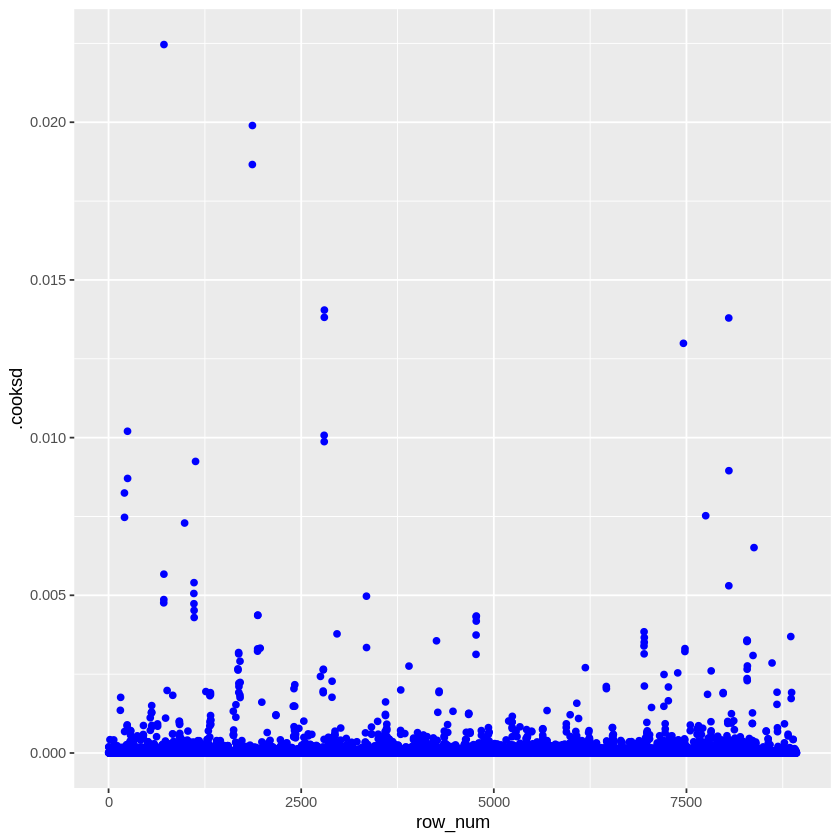

In [101]:
mlr1_aug$row_num <- 1:nrow(mlr1_aug)

ggplot(mlr1_aug, aes(x = row_num, y = .cooksd)) +
    geom_point(colour = "blue") # Cook's Distance

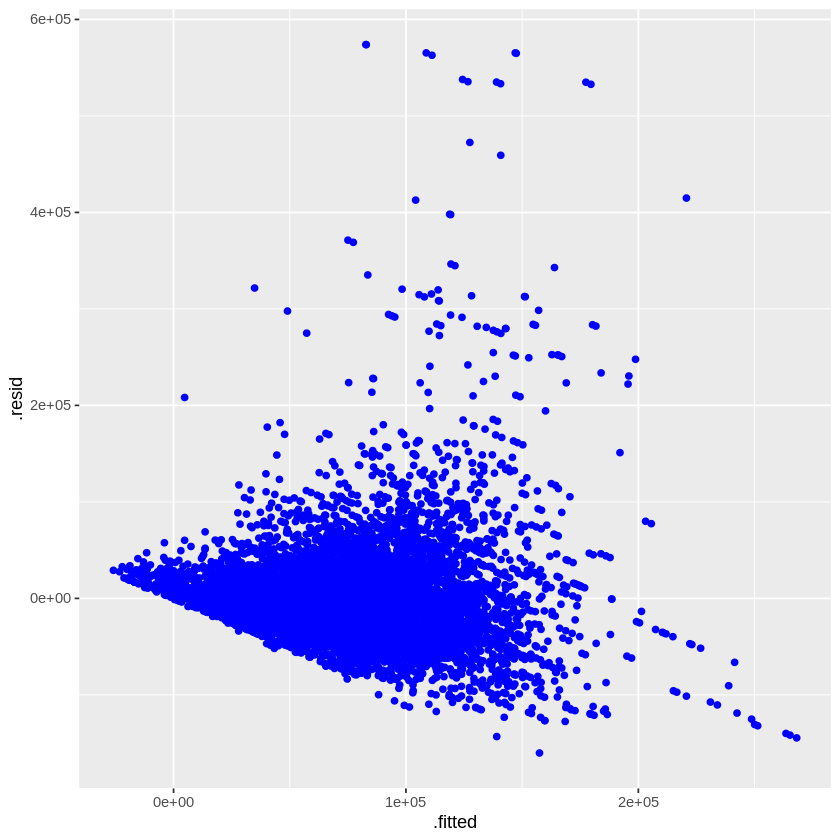

In [102]:
ggplot(mlr1_aug, aes(x = .fitted, y = .resid)) +
    geom_point(colour = "blue") # Residuals vs. Fitted Values

In [103]:
# The end. 